In [1]:
import pandas as pd

In [4]:
address="http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv"
df = pd.read_csv(address)

In [10]:
df.head()
#print df.tail()
#print df.shape

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [11]:
#to set the unnamed column as index
address="http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv"
df = pd.read_csv(address, index_col=0)
df.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [12]:
import seaborn as sns
%matplotlib inline

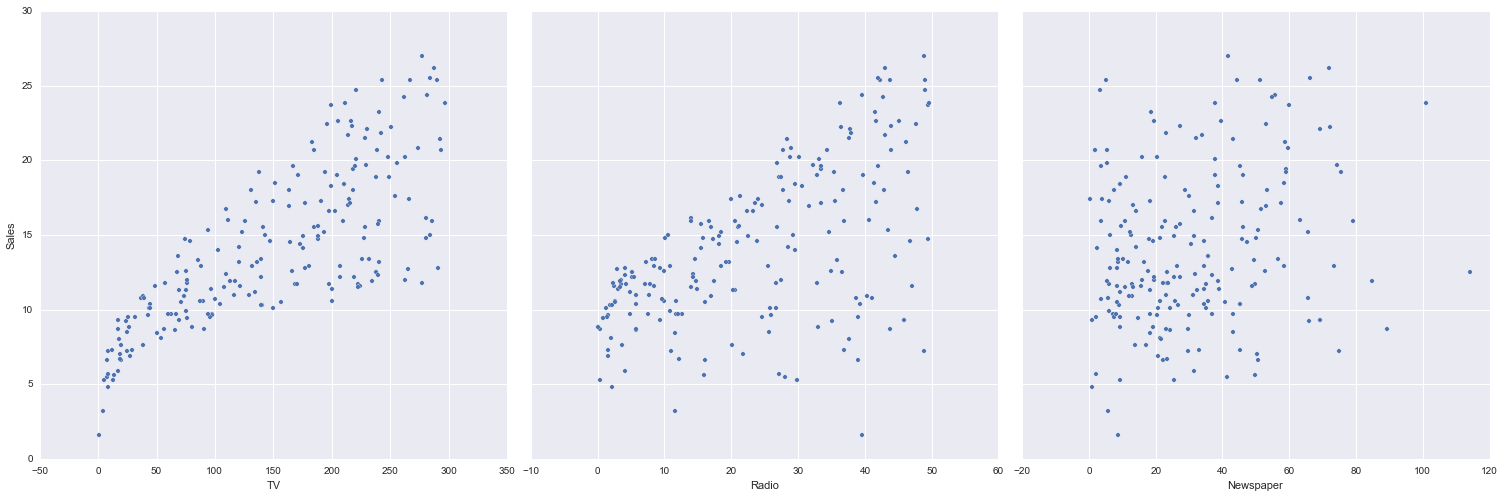

In [14]:
#using seaborn for plotting pairplot
sns.pairplot(df, x_vars=['TV', 'Radio', 'Newspaper'], y_vars=["Sales"], size=7)

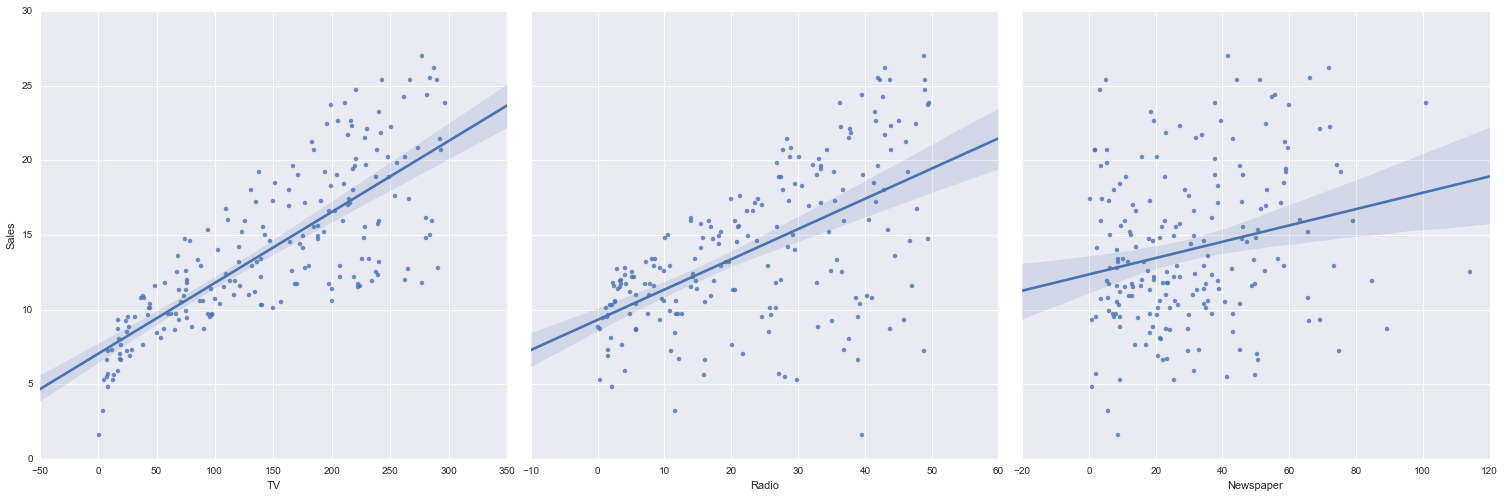

In [16]:
sns.pairplot(df, x_vars=['TV', 'Radio', 'Newspaper'], y_vars=["Sales"], size=7,kind='reg')

In [18]:
X= df[['TV', 'Radio', 'Newspaper']]
#it is the same as the following
#y=df['Sales']
y=df.Sales

print X.shape
print y.shape

(200, 3)
(200L,)


In [38]:
from sklearn.cross_validation import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=.25)
print Xtrain.shape
print Xtest.shape
print ytrain.shape
print ytest.shape

(150, 2)
(50, 2)
(150L,)
(50L,)


In [39]:
from sklearn.linear_model import LinearRegression
linr = LinearRegression()
linr.fit(Xtrain, ytrain)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [40]:
print linr.coef_
print linr.intercept_

[ 0.04672602  0.17851683]
3.03461833447


In [41]:
#pair the coef with features
zip(linr.coef_, ['TV', 'Radio', 'Newspaper'])

[(0.046726016150566763, 'TV'), (0.17851682724138945, 'Radio')]

In [42]:
ypred = linr.predict(Xtest)
ypred[0:5]

array([ 16.4271212 ,   9.4396719 ,  13.68177579,  14.20177242,  18.40494335])

In [43]:
#metrics
#1-Mean Absolute Error
from sklearn.metrics import mean_absolute_error
print "MAE: ",mean_absolute_error(ypred, ytest)

MAE:  1.44625775381


In [44]:
from sklearn.metrics import mean_squared_error
print "MSE:", mean_squared_error(ypred, ytest)

MSE: 3.11604800083


In [45]:
print "RMSE:", (mean_squared_error(ypred, ytest)**.5)

RMSE: 1.76523312932


In [47]:
#Another modeling with just TV and Radio
cols=["TV", "Radio"]
X=df[cols]
y=df.Sales
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y)

lin=LinearRegression()
lin.fit(Xtrain, ytrain)
ypred=lin.predict(Xtest)

print "RMSE: " , mean_squared_error(ypred, ytest)**0.5

RMSE:  1.43399564918


In [48]:
from sklearn.metrics import r2_score
print r2_score(ypred, ytest)

0.928815216641
